In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib

In [24]:
# load the X_train, y_train, X_test, y_test datasets

import joblib

# Load the data splits
X_train = joblib.load('C:/Users/amita/github/team_lambda/Data/X_train.pkl')
X_test = joblib.load('C:/Users/amita/github/team_lambda/Data/X_test.pkl')
y_train = joblib.load('C:/Users/amita/github/team_lambda/Data/y_train.pkl')
y_test = joblib.load('C:/Users/amita/github/team_lambda/Data/y_test.pkl')

In [26]:
#Hypertunning xg-boost

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, 
                                   n_iter=20, scoring='roc_auc', 
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Save the best model
joblib.dump(best_model, 'C:/Users/amita/github/team_lambda/Models/best_xgb_model.pkl')

# Evaluate
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]
print("Tuned ROC AUC:", roc_auc_score(y_test, y_proba_best))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned ROC AUC: 0.8158454647256438


c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:03:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import joblib

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_grid, 
                                   n_iter=20, scoring='roc_auc', 
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_rf_model = random_search.best_estimator_

# Save the best model
joblib.dump(best_rf_model, 'C:/Users/amita/github/team_lambda/Models/best_rf_model.pkl')

# Evaluate
y_pred_best = best_rf_model.predict(X_test)
y_proba_best = best_rf_model.predict_proba(X_test)[:, 1]
print("Tuned ROC AUC:", roc_auc_score(y_test, y_proba_best))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned ROC AUC: 0.8216685330347144


In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import joblib

# Define parameter grid for Neural Network
param_grid = {
    'hidden_layer_sizes': [(128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize Neural Network classifier
nn_clf = MLPClassifier(random_state=42, max_iter=500)

# Perform Randomized Search
random_search = RandomizedSearchCV(nn_clf, param_distributions=param_grid, 
                                   n_iter=20, scoring='roc_auc', 
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_nn_model = random_search.best_estimator_

# Save the best model
joblib.dump(best_nn_model, 'C:/Users/amita/github/team_lambda/Models/best_nn_model.pkl')

# Evaluate
y_pred_best = best_nn_model.predict(X_test)
y_proba_best = best_nn_model.predict_proba(X_test)[:, 1]
print("Tuned ROC AUC:", roc_auc_score(y_test, y_proba_best))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned ROC AUC: 0.4686450167973125


c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import joblib

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support l1 and elasticnet
}

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Perform Randomized Search
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, 
                                   n_iter=20, scoring='roc_auc', 
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_log_reg_model = random_search.best_estimator_

# Save the best model
joblib.dump(best_log_reg_model, 'C:/Users/amita/github/team_lambda/Models/best_log_reg_model.pkl')

# Evaluate
y_pred_best = best_log_reg_model.predict(X_test)
y_proba_best = best_log_reg_model.predict_proba(X_test)[:, 1]
print("Tuned ROC AUC:", roc_auc_score(y_test, y_proba_best))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned ROC AUC: 0.7258678611422172


c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

In [34]:
#load the models
xgb_model = joblib.load('C:/Users/amita/github/team_lambda/models/best_xgb_model.pkl')
rf_model = joblib.load('C:/Users/amita/github/team_lambda/models/best_rf_model.pkl')
log_reg_model = joblib.load('C:/Users/amita/github/team_lambda/models/best_log_reg_model.pkl')
nn_model = joblib.load('C:/Users/amita/github/team_lambda/models/best_nn_model.pkl')


In [36]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score for {model_name}: {roc_auc_score(y_test, y_proba)}")

evaluate_model(xgb_model, X_test, y_test, "xgb_model")
evaluate_model(rf_model, X_test, y_test, "rf_model")
evaluate_model(log_reg_model, X_test, y_test, "log_reg_model")
evaluate_model(nn_model, X_test, y_test, "nn_model")


Classification Report for xgb_model:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        95
           1       0.76      0.65      0.70        94

    accuracy                           0.72       189
   macro avg       0.73      0.72      0.72       189
weighted avg       0.73      0.72      0.72       189

ROC AUC Score for xgb_model: 0.8158454647256438

Classification Report for rf_model:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        95
           1       0.74      0.68      0.71        94

    accuracy                           0.72       189
   macro avg       0.73      0.72      0.72       189
weighted avg       0.73      0.72      0.72       189

ROC AUC Score for rf_model: 0.8216685330347144

Classification Report for log_reg_model:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63        95
           1       0.6

In [42]:
import matplotlib.pyplot as plt

#. Hyperparameter Tuning Results
# Plot hyperparameter tuning results
def plot_hyperparameter_tuning_results(random_search, model_name):
    results = pd.DataFrame(random_search.cv_results_)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=results, x=results.index, y="mean_test_score", marker="o", label="Mean ROC AUC")
    plt.title(f"Hyperparameter Tuning Results for {model_name}")
    plt.xlabel("Iteration")
    plt.ylabel("Mean ROC AUC")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [37]:

#ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="teal", lw=2, label=f"PR Curve (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [39]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score for {model_name}: {roc_auc_score(y_test, y_proba)}")

    # Plot ROC Curve
    plot_roc_curve(y_test, y_proba, model_name)

    # Plot Precision-Recall Curve
    plot_precision_recall_curve(y_test, y_proba, model_name)


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        95
           1       0.76      0.65      0.70        94

    accuracy                           0.72       189
   macro avg       0.73      0.72      0.72       189
weighted avg       0.73      0.72      0.72       189

ROC AUC Score for XGBoost: 0.8158454647256438


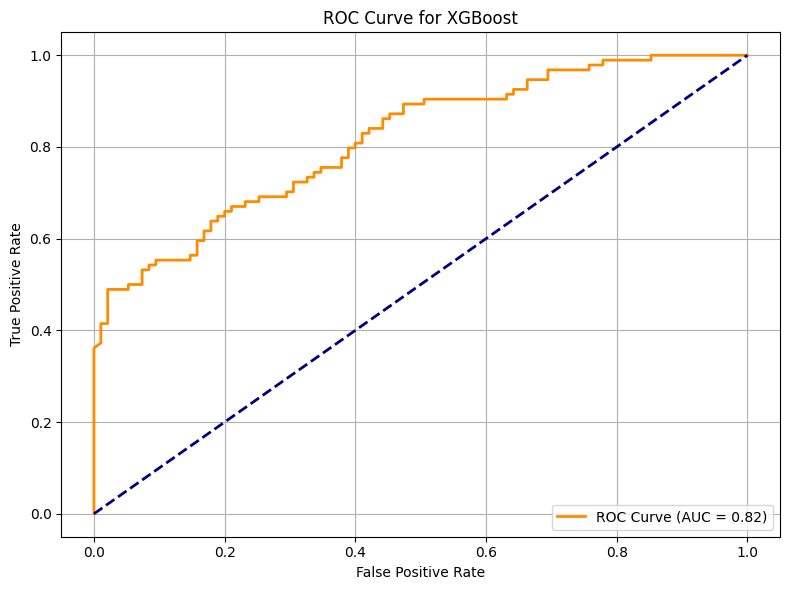

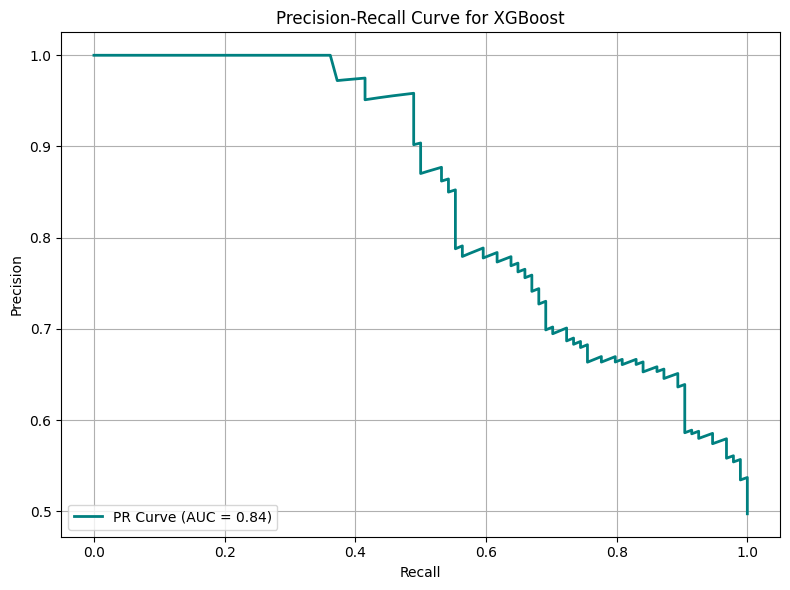


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        95
           1       0.74      0.68      0.71        94

    accuracy                           0.72       189
   macro avg       0.73      0.72      0.72       189
weighted avg       0.73      0.72      0.72       189

ROC AUC Score for Random Forest: 0.8216685330347144


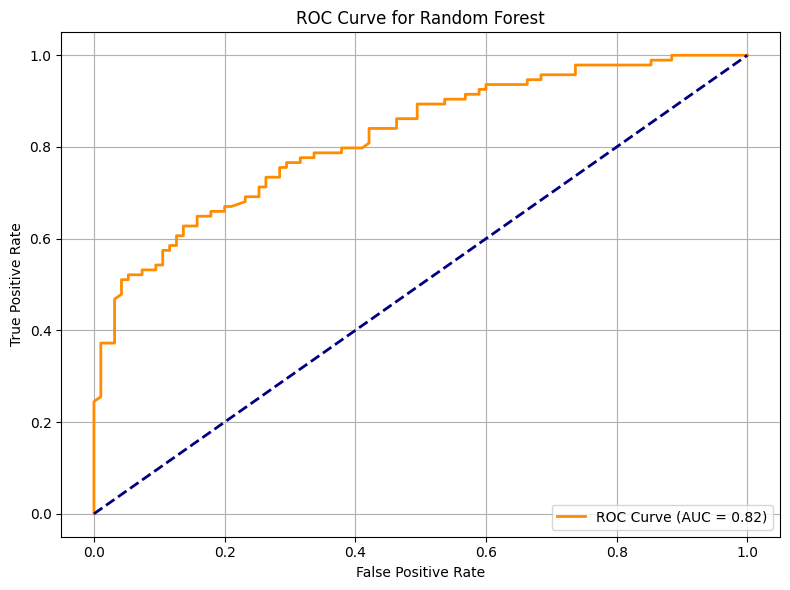

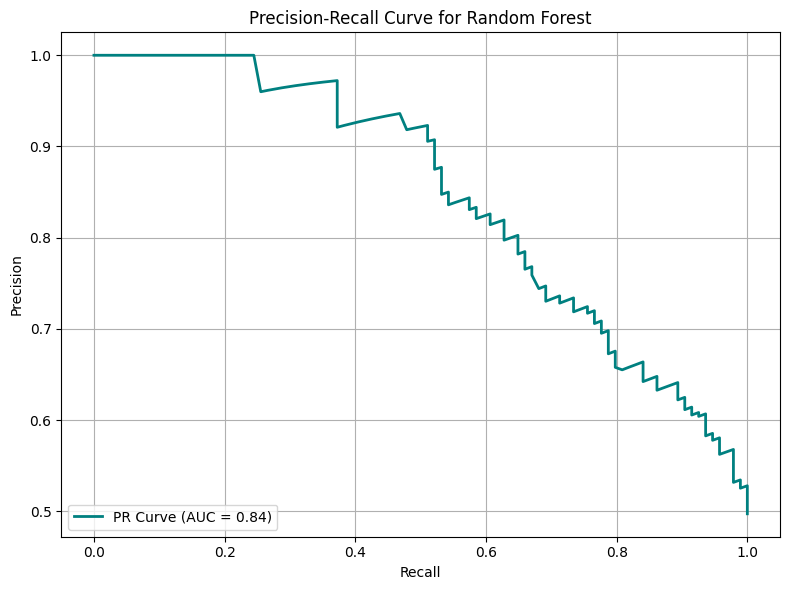


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63        95
           1       0.63      0.64      0.63        94

    accuracy                           0.63       189
   macro avg       0.63      0.63      0.63       189
weighted avg       0.63      0.63      0.63       189

ROC AUC Score for Logistic Regression: 0.7258678611422172


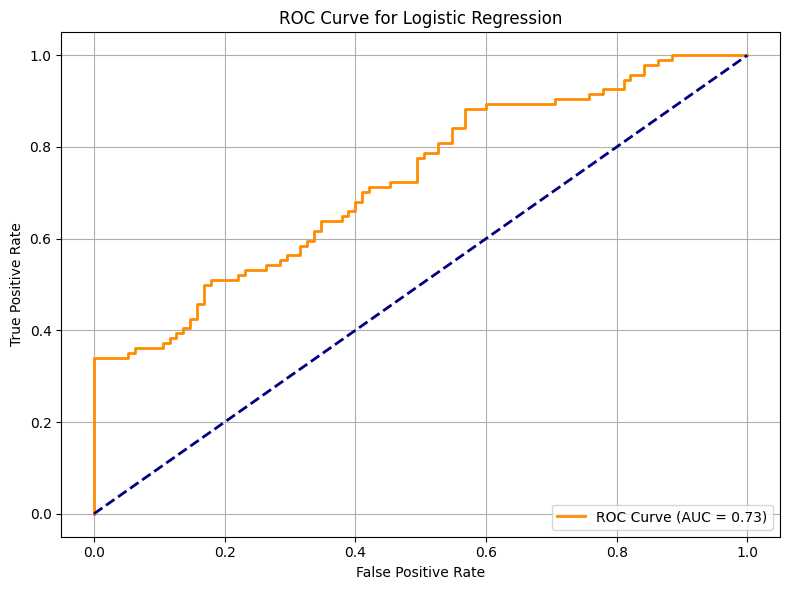

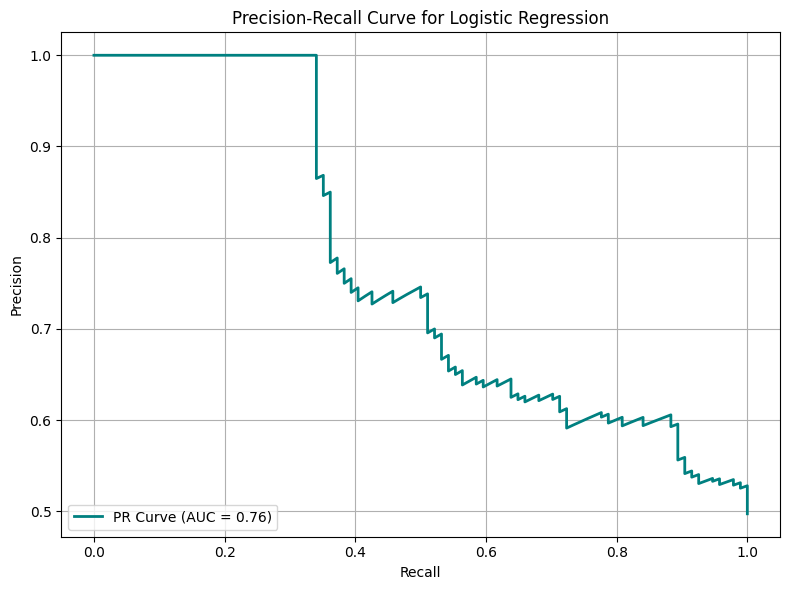


Classification Report for neural network:
               precision    recall  f1-score   support

           0       0.48      0.93      0.64        95
           1       0.00      0.00      0.00        94

    accuracy                           0.47       189
   macro avg       0.24      0.46      0.32       189
weighted avg       0.24      0.47      0.32       189

ROC AUC Score for neural network: 0.4686450167973125


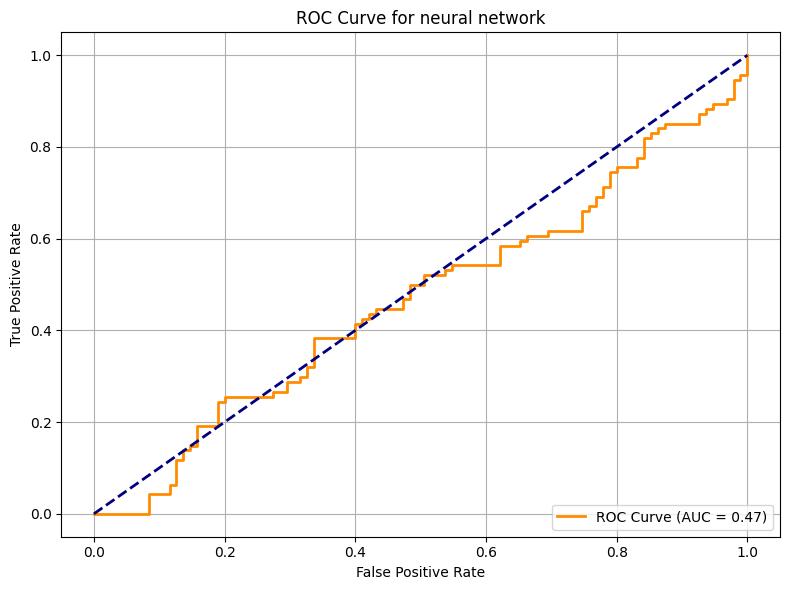

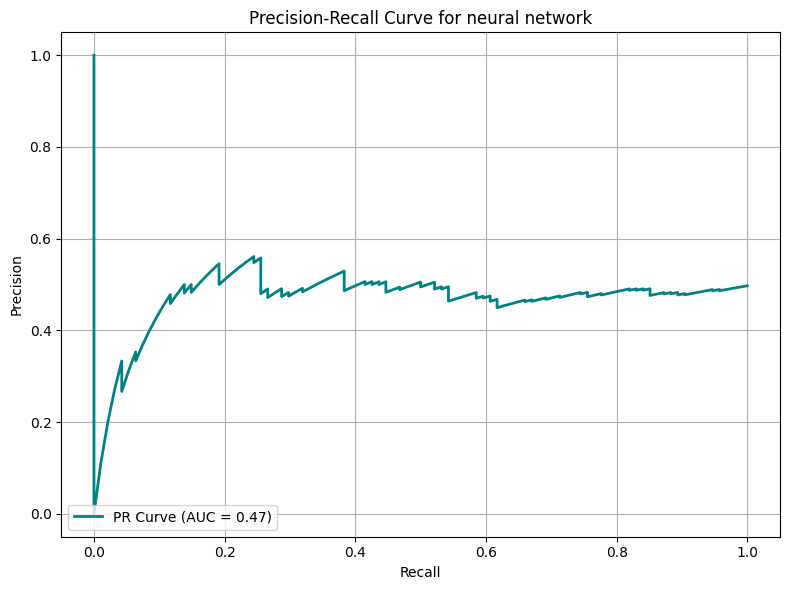

In [41]:
# Evaluate XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Evaluate Logistic Regression
evaluate_model(log_reg_model, X_test, y_test, "Logistic Regression")

# Evaluate nn Regression
evaluate_model(nn_model, X_test, y_test, "neural network")